In [1]:
import pandas as pd

In [5]:
df=pd.read_csv('./datas/train.tsv',header=0,delimiter='\t')
df.shape

(156060, 4)

In [8]:
df.columns
df.count()

PhraseId      156060
SentenceId    156060
Phrase        156060
Sentiment     156060
dtype: int64

In [9]:
df.head(5)

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [16]:
df.last

<bound method NDFrame.last of         PhraseId  SentenceId  \
0              1           1   
1              2           1   
2              3           1   
3              4           1   
4              5           1   
...          ...         ...   
156055    156056        8544   
156056    156057        8544   
156057    156058        8544   
156058    156059        8544   
156059    156060        8544   

                                                   Phrase  Sentiment  
0       A series of escapades demonstrating the adage ...          1  
1       A series of escapades demonstrating the adage ...          2  
2                                                A series          2  
3                                                       A          2  
4                                                  series          2  
...                                                   ...        ...  
156055                                          Hearst 's          2  
156056           

In [10]:
df.describe()

,PhraseId,SentenceId,Sentiment
count,156060.000000,156060.000000,156060.000000
mean,78030.500000,4079.732744,2.063578
std,45050.785842,2502.764394,0.893832
min,1.000000,1.000000,0.000000
25%,39015.750000,1861.750000,2.000000
50%,78030.500000,4017.000000,2.000000
75%,117045.250000,6244.000000,3.000000
max,156060.000000,8544.000000,4.000000


In [11]:
df['Sentiment'].value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

In [12]:
df['Sentiment'].value_counts()/df.shape[0]

2    0.509945
3    0.210989
1    0.174760
4    0.058990
0    0.045316
Name: Sentiment, dtype: float64

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,confusion_matrix,classification_report

In [20]:
X,y=df['Phrase'],df['Sentiment']
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.5)

In [25]:
pipeline=Pipeline([('tfidf',TfidfVectorizer()),('logr',LogisticRegression())])
params={
    'tfidf__max_df': (0.25, 0.5, 0.75),
    'tfidf__stop_words': ('english', None),
    'tfidf__max_features': (2500, 5000, None),
    'tfidf__ngram_range': ((1, 1), (1, 2)),
    'tfidf__use_idf': (True, False),
    'logr__penalty': ('l1', 'l2'),
    'logr__C': (0.01, 0.1, 1, 10),
}
grid_search=GridSearchCV(estimator=pipeline,param_grid=params,n_jobs=-1,cv=3,verbose=1,scoring='accuracy')

In [26]:
grid_search.fit(X_train,y_train)
grid_search.best_score_

Fitting 3 folds for each of 576 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed: 12.4min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed: 20.7min finished
c:\users\root\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLV

0.6229142637447136

In [34]:
param_name=grid_search.best_estimator_.get_params()
for name1 in params.keys():
    print(name1,'-->',param_name[name1])

tfidf__max_df --> 0.5
tfidf__stop_words --> None
tfidf__max_features --> None
tfidf__ngram_range --> (1, 2)
tfidf__use_idf --> False
logr__penalty --> l2
logr__C --> 10


In [35]:
y_=grid_search.predict(X_test)

In [36]:
accuracy_score(y_test,y_)

0.6321927463795975

In [37]:
matthews_corrcoef(y_test,y_)

0.4146847264350234

In [39]:
confusion=confusion_matrix(y_test,y_)
confusion

array([[ 1021,  1734,   748,   106,    20],
       [  740,  5751,  6445,   569,    59],
       [  223,  2941, 32854,  3587,   180],
       [   21,   412,  6672,  8157,  1124],
       [    4,    58,   558,  2499,  1547]], dtype=int64)

In [41]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'true')

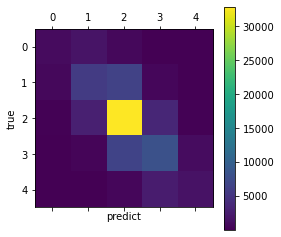

In [45]:
plt.matshow(confusion)
plt.colorbar()
plt.xlabel('predict')
plt.ylabel('true')

In [50]:
classification_report(y_test,y_)

'              precision    recall  f1-score   support\n\n           0       0.51      0.28      0.36      3629\n           1       0.53      0.42      0.47     13564\n           2       0.69      0.83      0.75     39785\n           3       0.55      0.50      0.52     16386\n           4       0.53      0.33      0.41      4666\n\n    accuracy                           0.63     78030\n   macro avg       0.56      0.47      0.50     78030\nweighted avg       0.62      0.63      0.62     78030\n'